In [9]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import shapely as shp
import hvplot.pandas 
import matplotlib.pyplot as plt

from geopandas import GeoDataFrame, read_file
from shapely.geometry import Point, LineString, Polygon
from datetime import datetime, timedelta
from holoviews import opts, Layout, dim
import holoviews as hv

import warnings
warnings.filterwarnings('ignore')

plot_defaults = {'linewidth':5, 'capstyle':'round', 'figsize':(9,3), 'legend':True}
opts.defaults(opts.Overlay(active_tools=['wheel_zoom'], frame_width=500, frame_height=400))
aggregatorOpts = { 'max_distance':1000, 'min_distance':100, 'min_stop_duration':timedelta(minutes=1)}

Load Filtered Sample

In [10]:
filtered_sample = pd.read_csv('./train_filtered_sample.csv')
filtered_sample['geometry'] = filtered_sample[['lng', 'lat',]].apply(Point, axis=1)

**Q0: Qual a maior velocidade registrada?**

In [11]:
sample_gdf = gpd.GeoDataFrame(filtered_sample, crs='WGS84')
sample_tc = mpd.TrajectoryCollection(sample_gdf, obj_id_col='uid', traj_id_col='trip_id', t='datetime', x='lng', y='lat')
sample_tc.add_speed(overwrite=True)

In [12]:
max_speed = sample_tc.get_max('speed')
print('Maior velocidade registrada é {:,.2f} km/h'.format(max_speed*3600/1000))

Maior velocidade registrada é 292.46 km/h


**Q1: O número de pontos para cada taxi_id são igualmente distribuídos?**

<Axes: title={'center': 'Número de pontos para cada taxi'}, xlabel='uid'>

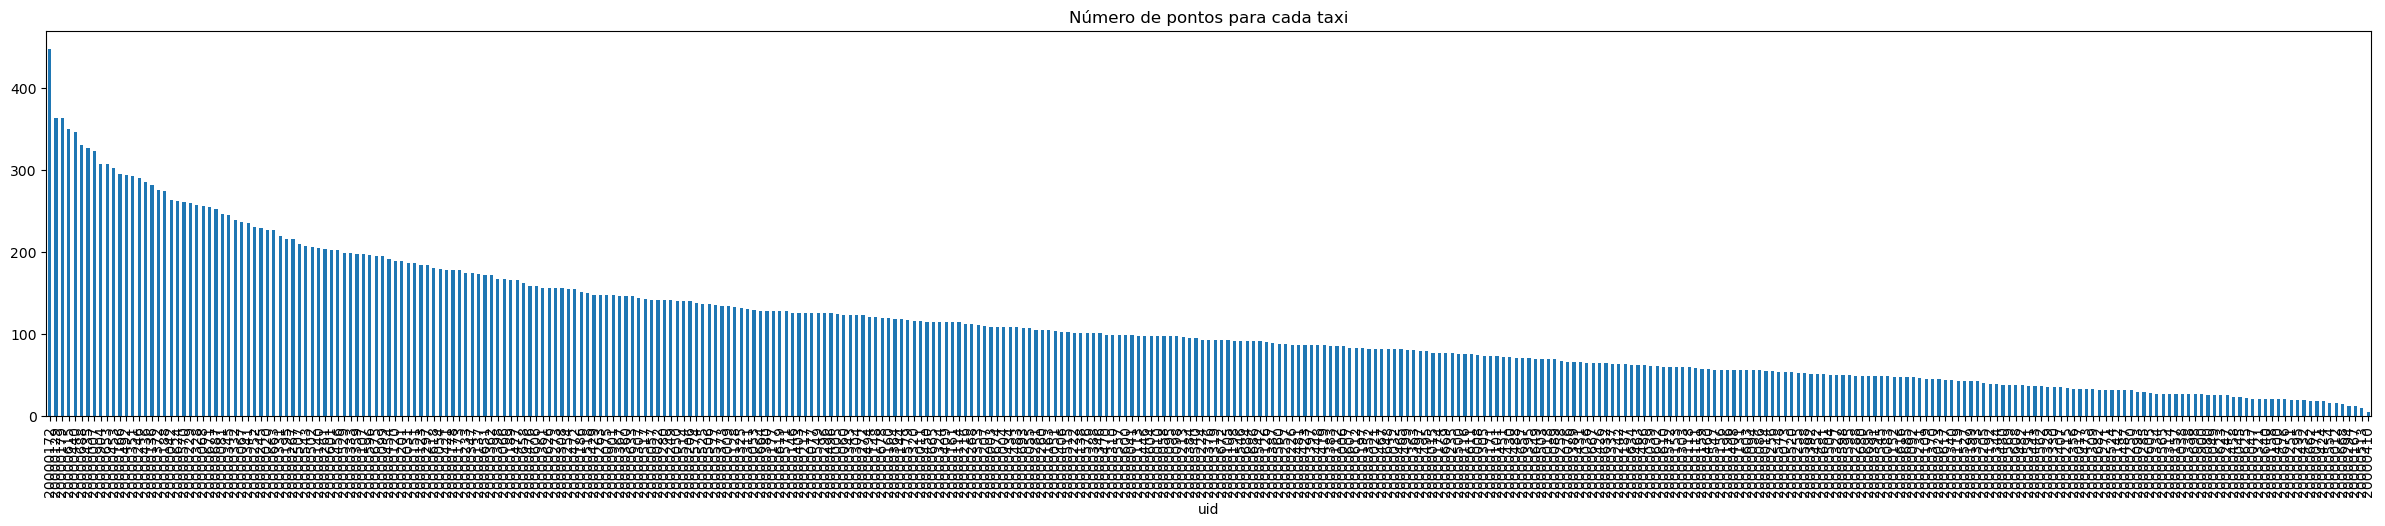

In [13]:
filtered_sample['uid'].value_counts().plot(title='Número de pontos para cada taxi', kind='bar', figsize=(30, 5))

**Q2: Onde ficam os pontos mais significantes, os agrupamentos com maior densidade e qual o fluxo entre eles?**

In [14]:
sample_gdf = gpd.GeoDataFrame(filtered_sample, crs='WGS84')
sample_tc = mpd.TrajectoryCollection(sample_gdf, obj_id_col='uid', traj_id_col='trip_id', t='datetime', x='lng', y='lat')
traj_aggregation =  mpd.TrajectoryCollectionAggregator(sample_tc, **aggregatorOpts)
flows = traj_aggregation.get_flows_gdf()
clusters = traj_aggregation.get_clusters_gdf()
plot = (
    flows.hvplot(geo=True, hover_cols=['weight'], line_width=dim('weight')/5, color='#68a7c6', tiles='CartoLight') *
    clusters.hvplot(geo=True, c='n', size=dim('n')/50, cmap='Oranges')
)
plot

**Q3: Existe uma lacuna expacial nos dados de mobilidade?**

In [15]:
print(f'A amostra começa em {filtered_sample["datetime"].min()} e termina em {filtered_sample["datetime"].max()}')

A amostra começa em 2013-07-01 05:55:41 e termina em 2014-06-30 09:22:04


In [16]:
sample_gdf = gpd.GeoDataFrame(filtered_sample, crs='WGS84')
# set datetime as index
sample_gdf = sample_gdf.to_crs({'init': 'epsg:4326'})
sample_gdf['datetime'] = sample_gdf['datetime'].astype('datetime64[ms]')
sample_gdf = sample_gdf.set_index('datetime')

In [17]:
sample_gdf.resample('D').count().hvplot(title='Número de pontos por dia.')

:NdOverlay   [Variable]
   :Curve   [datetime]   (value)

**Q4: A Densidade e fluxos de mobilidade mudam durante os dias da semana?**

In [18]:
sample_gdf = gpd.GeoDataFrame(filtered_sample, crs='WGS84')
# set datetime as index
sample_gdf = sample_gdf.to_crs({'init': 'epsg:4326'})
sample_gdf['datetime'] = sample_gdf['datetime'].astype('datetime64[ms]')
sample_gdf = sample_gdf.set_index('datetime')
# plot moviment cluster e flows for each day of week
plots = []
for i, day_name in enumerate(sample_gdf.index.day_name().unique()):
    data_day_of_week = sample_gdf[sample_gdf.index.day_name() == day_name]
    tc_in_day_of_week = mpd.TrajectoryCollection(data_day_of_week, obj_id_col='uid', traj_id_col='trip_id', t='datetime', x='lng', y='lat')
    traj_aggregation =  mpd.TrajectoryCollectionAggregator(tc_in_day_of_week, **aggregatorOpts)
    flows = traj_aggregation.get_flows_gdf()
    clusters = traj_aggregation.get_clusters_gdf()
    plot = (
        flows.hvplot(geo=True, hover_cols=['weight'], line_width=dim('weight'), color='#68a7c6', tiles='CartoLight') *
        clusters.hvplot(geo=True, c='n', size=dim('n')/5, title=day_name, cmap='Oranges')
    )
    plots.append(plot)
Layout(plots).cols(3)

:Layout
   .Overlay.I   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Path.I   :Path   [Longitude,Latitude]   (weight)
      .Points.I :Points   [Longitude,Latitude]   (n)
   .Overlay.II  :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Path.I   :Path   [Longitude,Latitude]   (weight)
      .Points.I :Points   [Longitude,Latitude]   (n)
   .Overlay.III :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Path.I   :Path   [Longitude,Latitude]   (weight)
      .Points.I :Points   [Longitude,Latitude]   (n)
   .Overlay.IV  :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Path.I   :Path   [Longitude,Latitude]   (weight)
      .Points.I :Points   [Longitude,Latitude]   (n)
   .Overlay.V   :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Path.I   :Path   [Longitude,Latitude]   (weight)
      .Points.I :Points   [Longitude,Latitude]   (n)
   .Overlay.VI  :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Path.I   :Path   [Longitude,Latitude]   (weight)
      .Points.I :Points   [Longitude,Latitude]   (n)
   .Overlay.VII :Overlay
      .Tiles.I  :Tiles   [x,y]
      .Path.I   :Path   [Longitude,Latitude]   (weight)
      .Points.I :Points   [Longitude,Latitude]   (n)